## Data preparation and preprocessing

### Short introduction

We are the Conloquor team, which means dialogue in latin. We will be developing a chatbot for our project this semester.

Members:

- Béres Bálint
- Drexler Konrád
- Drexler Kristóf

### Data source

We found a dataset on [reddit](https://www.reddit.com/r/datasets/comments/3bxlg7/i_have_every_publicly_available_reddit_comment/)
which includes all the reddit comments categorized by month. A user uploaded the entire dataset to google's
bigquery platform, here's the [reddit](https://www.reddit.com/r/bigquery/comments/3cej2b/17_billion_reddit_comments_loaded_on_bigquery/)
thread.

### Downloading the data

We chose to use comments from may, 2015 for our project. For this we ran the following SQL query on the bigquery platform.

```SQL
select *
from `fh-bigquery.reddit_comments.2015_05`
where subreddit like 'science'
    or subreddit like 'politics'
    or subreddit like 'gaming'
    or subreddit like 'worldnews'
    or subreddit like 'CasualConversation'
    or subreddit like 'sports'
```

At first we downloaded all the comments made that month, but the resulting file was 5GB compressed.
Therefore, we limited the source subreddits to **r/science**, **r/politics**, **r/gaming**,
**r/worldnews**, **r/CasualConversation** and **r/sports**. This query still yielded 1.45 million
comments to work with, but was a manageable size. We exported the resulting table to a json file;
 `data_2015_05.json`. This `.json` is available on my [google drive](https://drive.google.com/file/d/13n1ET0mppD6i-DjqyJIFjAiMQp6V7v6q/view?usp=sharing).
 In the future, the project will automatically download the data.

## Formatting the data for preprocessing

The initial json file still had a lot of unnecessary columns and unusable rows. Using further SQL queries we
trimmed and transformed the data to fit our needs. At the end of the process we were left with just short of
480000 message-response pairs. This was done by by filtering out messages longer than 200 characters, [deleted] messages
and hyperlink only messages to name a few.

In [ ]:
# these libraries are not in the google colab repertoir by default, it needs to be installed manually
!pip install pandasql
!pip install googledrivedownloader

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd

# download raw data from the link mentioined above
gdd.download_file_from_google_drive(file_id='13n1ET0mppD6i-DjqyJIFjAiMQp6V7v6q',
                                    dest_path='./data_2015_05.json',
                                    unzip=False)

In [ ]:
# import statements
import pandas as pd
import pandasql as ps

In [ ]:
# Create dataframe from json file
raw_data_df = pd.read_json(r'data_2015_05.json', orient='records', lines=True)

In [ ]:
# Show top ten rows
raw_data_df.head(10)

,body,score_hidden,archived,name,author,downs,created_utc,subreddit_id,link_id,parent_id,score,retrieved_on,controversiality,gilded,id,subreddit,ups,author_flair_text,author_flair_css_class,distinguished
0,That wasn't just a personal belief of his. It'...,False,False,t1_cr7h0ln,tejon,0,1431494075,t5_2cneq,t3_35ql9d,t1_cr7fnj4,136,1433034878,0,0,cr7h0ln,politics,136,NaN,NaN,NaN
1,I think you're on to something there. But to b...,False,False,t1_crpxkmu,Tangpo,0,1432999141,t5_2cneq,t3_37tyhm,t1_crpw8y8,17,1433393342,0,0,crpxkmu,politics,17,NaN,NaN,NaN
2,They've also been rather clear on defining a f...,False,False,t1_cr43h2c,Qu1nlan,0,1431220695,t5_2cneq,t3_35eepj,t1_cr439ea,19,1432870611,0,0,cr43h2c,politics,19,NaN,NaN,NaN
3,God bless you.,False,False,t1_cr5rn0g,broncoz33,0,1431370502,t5_2qh03,t3_35liga,t1_cr5qa14,13,1432899458,0,0,cr5rn0g,gaming,13,NaN,NaN,NaN
4,Western corporations don't give a rats arse to...,False,False,t1_cra1d35,critfist,0,1431701414,t5_2qh13,t3_361cco,t1_cra0qd0,-4,1433079241,0,0,cra1d35,worldnews,-4,NaN,NaN,NaN
5,[deleted],False,False,t1_cqvze0l,[deleted],0,1430571181,t5_2qh13,t3_34lnbr,t1_cqvye5y,-3,1432729493,0,0,cqvze0l,worldnews,-3,NaN,NaN,NaN
6,http://en.wikipedia.org/wiki/Celebration_Cruis...,False,False,t1_crqsdm6,Atheist101,0,1433078136,t5_323oy,t3_37v2sr,t1_crqdes4,-4,1433496812,0,0,crqsdm6,CasualConversation,-4,NaN,NaN,NaN
7,"I'm not attacking them, I'm making an observat...",False,False,t1_crahjf8,utb040713,0,1431728711,t5_mouw,t3_3622fk,t1_cragizb,0,1433087005,0,0,crahjf8,science,0,NaN,NaN,NaN
8,"Well, that's a vile and disgusting thing to sa...",False,False,t1_cr4qp74,Fractal_Soul,0,1431286132,t5_2cneq,t3_35ffem,t1_cr4div8,0,1432881767,0,0,cr4qp74,politics,0,NaN,NaN,NaN
9,Are you 15? Lol,False,False,t1_crcbtar,chuchubaba,0,1431900496,t5_2qh03,t3_369dwg,t1_crc88ht,0,1433118815,0,0,crcbtar,gaming,0,NaN,NaN,NaN


In [ ]:
# Filter raw data:
# select only rows which have a length less than 200, and the comment wasn't [deleted]
sql_query = " select body" \
            "       , name" \
            "       , link_id" \
            "       , parent_id" \
            "       , score" \
            " from raw_data_df" \
            " where length(body) < 200 and body <> '[deleted]'"
# Can only be saved as sdf since this is how pandas works.
sdf = ps.sqldf(sql_query)

In [ ]:
# Delete the original Dataframe to save memory
del raw_data_df

In [ ]:
# List of regular expressions to further filter the bodies of the comments;

# Remove all links from the comments
sdf.replace(r'https?://(www.)?[-a-zA-Z0-9@:%.+~#=]{1,256}.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9(_)@:%+.~#?&//=]*)','',regex=True, inplace = True)

# Remove all user links/subreddit links
sdf.replace(r'(/u/)?(r/)?(^)?(\\)?','',regex=True, inplace = True)

# Replace '&gt;' and '&lt' with '<' and '>' respectively
sdf.replace(r'(&gt;)','>',regex=True, inplace = True)
sdf.replace(r'(&lt)','<',regex=True, inplace = True)

# Replace '&amp' with an ampersand
sdf.replace(r'(&amp;)','&',regex=True, inplace = True)

In [ ]:
# Rename body column to response
response_df = sdf.rename(columns={'body': 'response'})

In [ ]:
# Show top ten rows
response_df.head(10)

,response,name,link_id,parent_id,score
0,They've also been rather clear on defining a f...,t1_cr43h2c,t3_35eepj,t1_cr439ea,19
1,God bless you.,t1_cr5rn0g,t3_35liga,t1_cr5qa14,13
2,Western corporations don't give a rats arse to...,t1_cra1d35,t3_361cco,t1_cra0qd0,-4
3,,t1_crqsdm6,t3_37v2sr,t1_crqdes4,-4
4,"Well, that's a vile and disgusting thing to sa...",t1_cr4qp74,t3_35ffem,t1_cr4div8,0
5,Are you 15? Lol,t1_crcbtar,t3_369dwg,t1_crc88ht,0
6,"Oh okay, cause a lot of people post similar ""t...",t1_crjr1yc,t3_372bqp,t1_crj8tdk,0
7,> according to analysts who monitor web chatte...,t1_cr2nszt,t3_357t9u,t3_357t9u,0
8,"Minavo Communications provides IVR solutions, ...",t1_cr5cntq,t3_35kx45,t3_35kx45,1
9,"Pfft, Convolvulaceae is where it's at. ;-)",t1_crmt7hn,t3_37gbrz,t1_crmsccb,1


In [ ]:
# Create query-response pairs
# Join the two tables to make a single one
# Concatenate '<eos>' to the end, and '<sos>' to the start of the response and store each of them, in a different column
sql_query = " select inp.body" \
            "       , resp.response || ' <eos>'" \
            "       , '<sos> ' || resp.response" \
            " from response_df resp" \
            " left join sdf inp" \
            " on resp.parent_id = inp.name" \
            " where inp.body is not null and inp.body <> '' and resp.response <> ''"
# Can only be saved as sdf since this is how pandas works.
sdf = ps.sqldf(sql_query)

In [ ]:
# Rename body to input, second column to output and third column to output_input
xy_df = sdf.rename(columns={'body': 'input', "resp.response || ' <eos>'": 'output', "'<sos> ' || resp.response": 'output_input'})

In [ ]:
# Delete sdf to free up memory
del sdf

In [ ]:
# show top ten rows of the new dataframe
xy_df.head(10)

,input,output,output_input
0,They've also been rather clear on defining a f...,"No, they have not. What gave you that idea? Th...","<sos> No, they have not. What gave you that id..."
1,Western corporations don't give a rats arse to...,"wow, ok have you ever heard of a thing called ...","<sos> wow, ok have you ever heard of a thing c..."
2,What was the conversation? I just killed them.,"""Something something something, then I raped t...","<sos> ""Something something something, then I r..."
3,Well it just shows us past behavior and what o...,"Guess you aren't a big believer in ""firsts""?\n...","<sos> Guess you aren't a big believer in ""firs..."
4,Solid advice to avoid a shaky end for TheEarth...,Agreed! <eos>,<sos> Agreed!
5,The whole schools discrimination provision was...,The fact my daughter is bottom of the list in ...,<sos> The fact my daughter is bottom of the li...
6,Hahaha yeah we can do that too. I just thought...,Nothing wrong with multitasking during a movie...,<sos> Nothing wrong with multitasking during a...
7,"Thank you!\n\nYeah, I like them and find them ...",Understandable. It's not a real exam if you do...,<sos> Understandable. It's not a real exam if ...
8,2 line pass.,False. But it was offside <eos>,<sos> False. But it was offside
9,Well shit... I never used boot bands to blouse...,My point exactly. <eos>,<sos> My point exactly.


In [ ]:
# Export to a json file this is so we don't have to run all previous cells again
xy_df.to_json('xy_data_2015_05.json', orient='records', lines=True)

In [ ]:
# Delete all to free memory
del response_df
del xy_df
del sql_query

## Preprocessing

Now that we have a dataset of usable message-response pairs, lets preprocess the data. The tokenizer encodes words into numbers,
a seperate tokenizer is used for the the message data and the output data. Next, we padded the messages to have a fixed size for all of our messages.
The `.json` file created in the previous section can be downloaded from this [google drive](https://drive.google.com/file/d/1J65cyCx6Zp1AgzTCGrB1Oqye9nkokmot/view?usp=sharing) link.

In [ ]:
!pip install googledrivedownloader

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd
# download organized data from the link mentioned above
gdd.download_file_from_google_drive(file_id='1J65cyCx6Zp1AgzTCGrB1Oqye9nkokmot',
                                    dest_path='./xy_data_2015_05.json',
                                    unzip=False)

In [ ]:
# import statements
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from IPython.display import clear_output

In [ ]:
# Load data from the saved json file
xy_data_df = pd.read_json(r'xy_data_2015_05.json', orient='records', lines=True)

In [ ]:
# for faster training we reduced the dataframe size
xy_data_df = xy_data_df[0:50000]  

In [ ]:
# Check a random row from the dataframe
print(xy_data_df['input'][172])
print()
print(xy_data_df['output'][172])
print()
print(xy_data_df['output_input'][172])

Do tell. How is it not true? 
Other than character skins, how are they not just pre set loadouts? 

you could unlock extra guys. one had a jet-pack if I remember correctly and another had invisibility.  <eos>

<sos> you could unlock extra guys. one had a jet-pack if I remember correctly and another had invisibility. 


In [ ]:
# set max number of words recognized by the model
MAX_NUM_WORDS = 10000

In [ ]:
# Text from the input column is tokenized

input_tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)

# Tokenizer is fitted
input_tokenizer.fit_on_texts(xy_data_df['input'])

# Sequences are generated from the text
input_integer_seq = input_tokenizer.texts_to_sequences(xy_data_df['input'])

# { word: index} dictionary of the input_tokenizer
word2idx_inputs = input_tokenizer.word_index
print('Total unique words in the input: %s' % len(word2idx_inputs))

# Word count and max input sentence length are stored
max_input_len = max(len(sen) for sen in input_integer_seq)
print("Length of longest sentence in input: %g" % max_input_len)

Total unique words in the input: 28846
Length of longest sentence in input: 45


In [ ]:
# Text from the output and output_input columns are tokenized
# the regex given is the default filter minus the '<' and '>' symbols,
# as these have been handled using SQL in the previous section
output_tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n)')

# Tokenizer is fitted
output_tokenizer.fit_on_texts(pd.concat([xy_data_df['output'], xy_data_df['output_input']]))

# Sequences are generated from the text
output_integer_seq = output_tokenizer.texts_to_sequences(xy_data_df['output'])
output_input_integer_seq = output_tokenizer.texts_to_sequences(xy_data_df['output_input'])

# { word: index} dictionary of the output_tokenizer
word2idx_outputs = output_tokenizer.word_index
print('Total unique words in the output: %s' % len(word2idx_outputs))

# Word count and max output sentence length are stored
num_words_output = len(word2idx_outputs) + 1
max_out_len = max(len(sen) for sen in output_integer_seq)
print("Length of longest sentence in the output: %g" % max_out_len)

Total unique words in the output: 33156
Length of longest sentence in the output: 45


In [ ]:
# input_integer_seq is padded which will be fed into the encoder
# max_input_len stores the maximum output sentence length
encoder_input_sequences = pad_sequences(input_integer_seq, maxlen=max_input_len)
print("encoder_input_sequences.shape:", encoder_input_sequences.shape)
print("encoder_input_sequences[172]:", encoder_input_sequences[172])

encoder_input_sequences.shape: (50000, 45)
encoder_input_sequences[172]: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  31 232  44   7   9  15 285 105
  75 719  44  14  21  15  22 970 634]


In [ ]:
# Example word indices from input_tokenizer
print(word2idx_inputs["ill"])
print(word2idx_inputs["skins"])

1719
10497


In [ ]:
# output_input_integer_seq is padded which will be fed into the decoder
# max_out_len stores the maximum output sentence length
decoder_input_sequences = pad_sequences(output_input_integer_seq, maxlen=max_out_len, padding='post')
print("decoder_input_sequences.shape:", decoder_input_sequences.shape)
print("decoder_input_sequences[172]:", decoder_input_sequences[172])

decoder_input_sequences.shape: (50000, 45)
decoder_input_sequences[172]: [   2    7  104 5194 1170  343   47   92    5 1549 2995   31    4  282
 1849    8  258   92    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0]


In [ ]:
# pad output sequences to the same length,
# namely to the maximum length of the output sequences
decoder_output_sequences = pad_sequences(output_integer_seq, maxlen=max_out_len, padding='post')
print("decoder_output_sequences.shape:", decoder_output_sequences.shape)
print("decoder_output_sequences[172]:", decoder_output_sequences[172])

decoder_output_sequences.shape: (50000, 45)
decoder_output_sequences[172]: [   7  104 5194 1170  343   47   92    5 1549 2995   31    4  282 1849
    8  258   92    1    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0]


In [ ]:
# Example word indices from output_tokenizer
print(word2idx_outputs["<eos>"])
print(word2idx_outputs["not"])
print(word2idx_outputs["correctly"])
# print(word2idx_outputs["invisibility"])

1
15
1849


The following two cells visualize the progress made up until this point

In [ ]:
subset_dict = {str(value): 0 for key, value in input_tokenizer.word_index.items()}
input_sequences = []

# The input and response sentences are tokenized 
# and the token occurrences are counted in subset_dict
for line in xy_data_df.iterrows():

    # Input tokenization
    token_list = input_tokenizer.texts_to_sequences([line[1][0]])[0]

    for token in token_list:
        subset_dict[str(token)] += 1

    # print('input')
    # print(token_list)
    # print(tokenizer.sequences_to_texts([token_list]))
    # print()

    # Response tokenization
    token_list = input_tokenizer.texts_to_sequences([line[1][1]])[0]

    # print('response')
    # print(token_list)
    # print(tokenizer.sequences_to_texts([token_list]))
    # print()

    for token in token_list:
        subset_dict[str(token)] += 1

the a to i you of is and it that in for this are not have on be but was they just like with what my so it's if


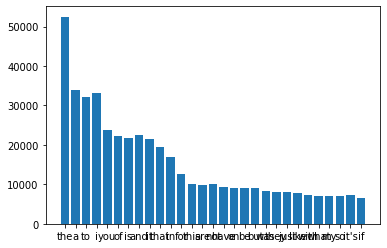

In [ ]:
import matplotlib.pyplot as plt

# A sequence from 0 to 29 is created
list_c = [i for i in range(30)]

# The string value of the 30 most used tokens are retrieved
example_seq = input_tokenizer.sequences_to_texts([list_c])[0]
print(example_seq)

# Turns the example_seq string into a list of words
x = example_seq.split()

# The 30 most popular words are plotted based on their occurrence
plt.bar(x, list(subset_dict.values())[:len(x)], align = 'center')
plt.show()

### Word embeddings

This is where our work for the second milestone starts. We relied heavily on [this](https://stackabuse.com/python-for-nlp-neural-machine-translation-with-seq2seq-in-keras/) guide on stackabuse. Although we made several modifications to get it to work with our dataset.

The following section embeds the words recognized by the model in a vector with 100 dimensions.

In [ ]:
# we used the pretrained vector embedding model GloVe
!wget http://nlp.stanford.edu/data/glove.6B.zip glove.6B.zip

--2020-12-11 10:06:16--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-12-11 10:06:16--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-12-11 10:06:16--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
# unzip the downloaded file
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
# import statements
from numpy import array
from numpy import asarray
from numpy import zeros

In [ ]:
#set embedding size
EMBEDDING_SIZE = 100

In [ ]:
# the embedding dictionary is a dictionary with the key being a word,
# and the value being the corresponding 100d vector
embeddings_dictionary = dict()

# open the file containing the 100d vectors
glove_file = open(r'glove.6B.100d.txt', encoding="utf8")

# iterate over the lines in the file
for line in glove_file:
    records = line.split()  # split along whitespaces
    word = records[0]       # the word itself is the first element of the list
    # the vector representation is the rest of the elements
    vector_dimensions = asarray(records[1:], dtype='float32')  
    embeddings_dictionary[word] = vector_dimensions  # insert word: vector representation into dictionary
glove_file.close()  # close GloVe file

In [ ]:
# create the embedding matrix

# limit the number of words understood by the model to MAX_NUM_WORDS
num_words = min(MAX_NUM_WORDS, len(word2idx_inputs) + 1)
# create embedding matrix filled with zeroes
embedding_matrix = zeros((num_words, EMBEDDING_SIZE))

# iterate over the first MAX_NUM_WORDS collected by the tokenizer
for word, index in list(word2idx_inputs.items())[:num_words-1]:
  # get embedding vector corresponding to the given word
  embedding_vector = embeddings_dictionary.get(word)
  # if embedding vector exists, the insert into relevant column of the mbedding matrix
  # null vector by default
  if embedding_vector is not None:
      embedding_matrix[index] = embedding_vector

In [ ]:
# some testing
index = 4997
print(num_words)

10000


In [ ]:
# print last word
print(list(word2idx_inputs.items())[index])

('nerds', 4998)


In [ ]:
# print embedding of word from the embedding dictionary
print(embeddings_dictionary[list(word2idx_inputs.items())[index][0]])

[-0.19674    0.35466    0.77021   -0.79855   -0.47644    0.73906
  0.14655   -0.53209    0.27152    0.68132    0.46877   -0.67652
 -0.10061    0.046754   0.041247   0.40438    0.24687    0.70391
 -0.036142   0.81965   -0.45159   -0.55595   -0.1448     0.12508
  0.44181   -0.0058418 -0.02297    0.65057   -0.071639  -0.88577
 -0.10025   -0.27953   -0.34384   -0.12254    0.42411    0.14245
 -0.42348    0.051886   0.55224   -0.73137   -0.18965    0.59574
 -0.83985   -0.30603   -0.25501   -0.42598    0.26483    0.9066
 -0.13073    0.22541   -0.53731   -0.58169   -0.28794    0.33422
 -0.61324    0.44146    0.59468    0.60291   -0.34503   -0.045412
  0.074943   0.0069484 -0.53309   -0.35747   -0.18395    0.60279
  0.40992    0.31927   -0.41532    0.42306    0.068268  -0.39861
 -0.33359    0.027311  -1.579     -0.075341   0.27954    0.19211
  0.47339    0.050369   0.070401   0.068903  -0.5099     0.86432
 -0.69013    0.18401   -0.54876   -0.19517   -0.8297    -0.30148
 -0.24203    0.57694   -0

In [ ]:
# print embedding of word from the embedding matrix, this should be about the same as the above output
# the discrepancies are due to the different type
print(embedding_matrix[list(word2idx_inputs.items())[index][1]])

[-0.19674     0.35466     0.77021003 -0.79855001 -0.47644001  0.73905998
  0.14655    -0.53209001  0.27151999  0.68132001  0.46877    -0.67651999
 -0.10061     0.046754    0.041247    0.40437999  0.24687     0.70390999
 -0.036142    0.81964999 -0.45159    -0.55594999 -0.14480001  0.12508
  0.44181001 -0.0058418  -0.02297     0.65056998 -0.071639   -0.88577002
 -0.10025    -0.27952999 -0.34384    -0.12254     0.42411     0.14245
 -0.42348     0.051886    0.55224001 -0.73136997 -0.18965     0.59574002
 -0.83985001 -0.30603001 -0.25501001 -0.42598     0.26482999  0.9066
 -0.13073     0.22541    -0.53731    -0.58169001 -0.28794     0.33421999
 -0.61324     0.44146001  0.59468001  0.60290998 -0.34503001 -0.045412
  0.074943    0.0069484  -0.53309    -0.35747001 -0.18395001  0.60279
  0.40992001  0.31927001 -0.41532001  0.42306     0.068268   -0.39861
 -0.33359     0.027311   -1.579      -0.075341    0.27954     0.19211
  0.47339001  0.050369    0.070401    0.068903   -0.50989997  0.86431998

### Solving data feed to the model
In this section we create a class and a function to feed the data to the model in small batches. In this the RAM isn't used up by a giant 3 dimensional one hot encoded matrix.

In [ ]:
from tensorflow.keras.utils import Sequence
import math

In [ ]:
# defining the batch size
BATCH_SIZE = 64

In [ ]:
class LSTM_data_generator(Sequence):
  '''generator class which creates a batch of data for each index based on the input data'''

  def __init__(self, x_set_1, x_set_2, y_set, batch_size, max_out_len, num_words):
    self.x_1, self.x_2, self.y = x_set_1, x_set_2, y_set
    self.batch_size = batch_size
    self.max_out_len = max_out_len
    self.num_words = num_words
    # sanity check
    assert len(self.x_1) == len(self.x_2)
    assert len(self.x_2) == len(self.y)

  def __len__(self):
    # calculate max length
    return math.floor(len(self.x_1) / self.batch_size)

  def __getitem__(self, idx):
    # create a batch_size batch of input data an one hot encoded matrix
    batch_x_1 = self.x_1[idx*self.batch_size : (idx + 1)*self.batch_size]
    batch_x_2 = self.x_2[idx*self.batch_size : (idx + 1)*self.batch_size]
    batch_y = self.y[idx*self.batch_size : (idx + 1)*self.batch_size]

    # create an empty matrix with the following sizes
    decoder_targets_one_hot = np.zeros((
      self.batch_size,
      self.max_out_len,
      self.num_words),dtype='float32')
    
    # fill the previously created null hypermatrix with one hot columns in the following fashion:
    # Insert value 1 into every r-th row of every c-th column of every m-th matrix where;
    # m is the index of the sentence in decoder_output_sequences: 1-st sentence -> m = 0, n-th sentence -> m = n-1
    # c is the place of the word in the sentence: 1-st word in sentence -> c = 0, n-th word in sentence -> c = n-1
    # r is the value given to the word by th output tokenizer: '<eos>' -> r = 1, 'not' -> r = 15        
    for m, sequence in enumerate(batch_y):
      for c, r in enumerate(sequence):
        decoder_targets_one_hot[m, c, r] = 1

    return [batch_x_1, batch_x_2], decoder_targets_one_hot

In [ ]:
def get_LSTM_data_generator(encoder_input_sequences, decoder_input_sequences, decoder_output_sequences, batch_size, max_out_len, num_words, val_split=0.2):
  # sanity check
  assert len(encoder_input_sequences) == len(decoder_input_sequences)
  assert len(decoder_input_sequences) == len(decoder_output_sequences)

  # calculate the lengths of the train and validation databases with as perfect a fit as possible
  # the train length should alwats be a multiple of batch size, validation length will be the remainder
  # thus ensuring the most efficient use of data
  whole_len = len(encoder_input_sequences)
  train_len = math.floor(whole_len * (1-val_split)/batch_size)*batch_size
  val_len = whole_len - train_len

  # create train dataframes
  train_x_1 = encoder_input_sequences[:train_len]
  train_x_2 = decoder_input_sequences[:train_len]
  train_y = decoder_output_sequences[:train_len]

  # create validation dataframes
  val_x_1 = encoder_input_sequences[train_len:]
  val_x_2 = decoder_input_sequences[train_len:]
  val_y = decoder_output_sequences[train_len:]

  # create train and validation data generation class instances
  train_data = LSTM_data_generator(train_x_1, train_x_2, train_y, batch_size, max_out_len, num_words)
  val_data = LSTM_data_generator(val_x_1, val_x_2, val_y, batch_size, max_out_len, num_words)

  return train_data, val_data

### Model structure
This section builds the model and trains it based on the data compiled in the previous sections.

In [ ]:
# import statements
import numpy as np
from tensorflow.keras.layers import Embedding

In [ ]:
# create embedding layer from embedding matrix
embedding_layer = Embedding(num_words, EMBEDDING_SIZE, weights=[embedding_matrix], input_length=max_input_len)

In [ ]:
# set number of LSTM nodes
LSTM_NODES = 256

In [ ]:
# import statements
from tensorflow.keras.layers import LSTM, Input, Dense
from tensorflow.keras import Model

In [ ]:
encoder_inputs_placeholder = Input(shape=(max_input_len,))

In [ ]:
# The encoder of the model is defined.
# The input of the encoder are the sentences and the output is
# the hidden state and cell state of the LSTM. 

x = embedding_layer(encoder_inputs_placeholder)
encoder = LSTM(LSTM_NODES, return_state=True)

encoder_outputs, h, c = encoder(x)
encoder_states = [h, c]

In [ ]:
# The decoder is defined.
# The input of the decoder are the hidden state and cell state of the
# encoder and the input sentence.
decoder_inputs_placeholder = Input(shape=(max_out_len,))

decoder_embedding = Embedding(num_words, LSTM_NODES)
decoder_inputs_x = decoder_embedding(decoder_inputs_placeholder)

decoder_lstm = LSTM(LSTM_NODES, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs_x, initial_state=encoder_states)

In [ ]:
# The output of the decoder is given to a dense layer to predict
# the decoder output.
decoder_dense = Dense(num_words, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [ ]:
# The model is connected and compiled. There are two inputs: the
# encoder and the decoder input.
model = Model([encoder_inputs_placeholder,
  decoder_inputs_placeholder], decoder_outputs)
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

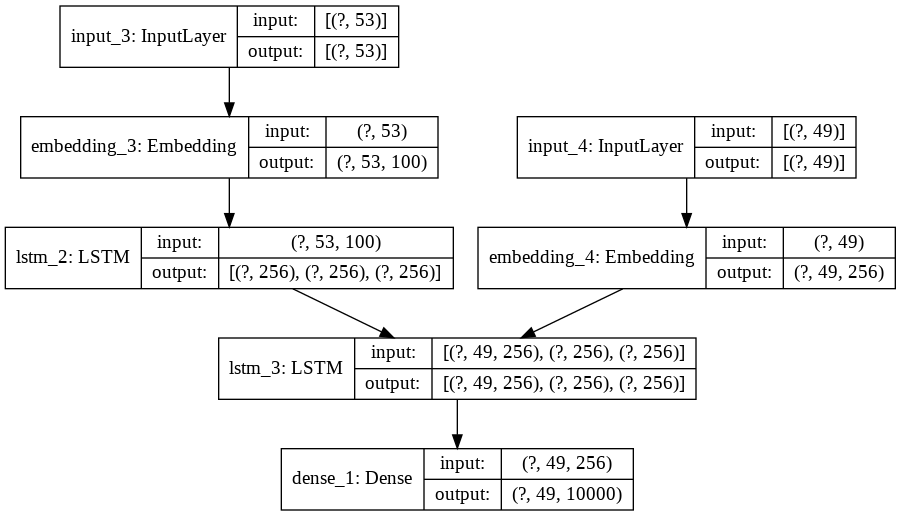

In [ ]:
# The structure of the model is plotted.
from keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [ ]:
# define input sentences
input_sentences = xy_data_df['input']

In [ ]:
train_d, val_d = get_LSTM_data_generator(encoder_input_sequences, decoder_input_sequences, decoder_output_sequences, BATCH_SIZE, max_out_len, num_words)

In [ ]:
EPOCHS = 20

In [ ]:
# The model is trained.
r = model.fit(
    x=train_d,
    validation_data = val_d,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS
)

Epoch 1/20
125/125 [==============================] - 11s 90ms/step - loss: 2.2361 - accuracy: 0.7057 - val_loss: 1.8554 - val_accuracy: 0.7257
Epoch 2/20
125/125 [==============================] - 11s 85ms/step - loss: 1.8481 - accuracy: 0.7246 - val_loss: 1.8161 - val_accuracy: 0.7279
Epoch 3/20
125/125 [==============================] - 11s 84ms/step - loss: 1.7931 - accuracy: 0.7282 - val_loss: 1.7757 - val_accuracy: 0.7328
Epoch 4/20
125/125 [==============================] - 10s 84ms/step - loss: 1.7442 - accuracy: 0.7332 - val_loss: 1.7476 - val_accuracy: 0.7358
Epoch 5/20
125/125 [==============================] - 11s 84ms/step - loss: 1.7053 - accuracy: 0.7360 - val_loss: 1.7268 - val_accuracy: 0.7380
Epoch 6/20
125/125 [==============================] - 10s 84ms/step - loss: 1.6725 - accuracy: 0.7381 - val_loss: 1.7146 - val_accuracy: 0.7392
Epoch 7/20
125/125 [==============================] - 10s 83ms/step - loss: 1.6429 - accuracy: 0.7399 - val_loss: 1.7078 - val_accuracy:

In [ ]:
def pretty_plot(history, field, fn):
  '''this is a function to plot the various metrics of the training'''
  import matplotlib.pyplot as plt 
  def plot(data, val_data, best_index, best_value, title):
    plt.plot(range(1, len(data)+1), data, label='train')
    plt.plot(range(1, len(data)+1), val_data, label='validation')
    if not best_index is None:
      plt.axvline(x=best_index+1, linestyle=':', c="#777777")
    if not best_value is None:
      plt.axhline(y=best_value, linestyle=':', c="#777777")
    plt.xlabel('Epoch')
    plt.ylabel(field)
    plt.xticks(range(0, len(data), 20))
    plt.title(title)
    plt.legend()
    plt.show()

  data = history.history[field]
  val_data = history.history['val_' + field]
  tail = int(0.15 * len(data))

  best_index = fn(val_data)
  best_value = val_data[best_index]

  plot(data, val_data, best_index, best_value, "{} over epochs (best {:06.4f})".format(field, best_value))
  plot(data[-tail:], val_data[-tail:], None, best_value, "{} over last {} epochs".format(field, tail))

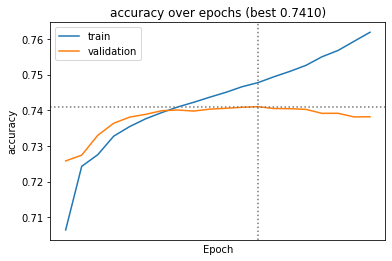

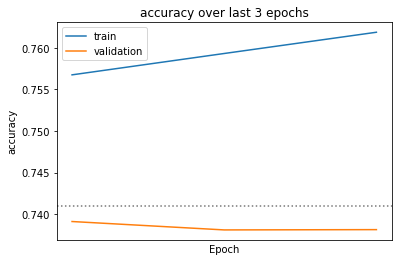

In [ ]:
# plotting the accuracy
pretty_plot(r, 'accuracy', lambda x: np.argmax(x))

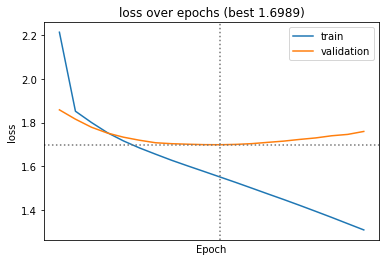

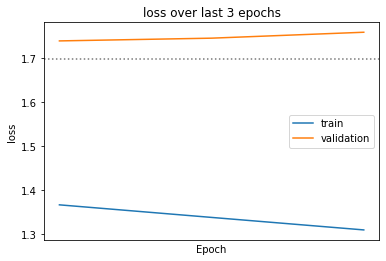

In [ ]:
# plotting the loss
pretty_plot(r, 'loss', lambda x: np.argmin(x))

### Modifying the model for predictions
In the following section the model is changed for predictions. The output sentence is predicted word by word. At every step the an output word will be predicted based on the results of the previous prediction

In [ ]:
# Encoder model is the same as last time.
encoder_model = Model(encoder_inputs_placeholder, encoder_states)

In [ ]:
# Input layers receive the hidden and cell states of the decoder. 
decoder_state_input_h = Input(shape=(LSTM_NODES,))
decoder_state_input_c = Input(shape=(LSTM_NODES,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

In [ ]:
# At each step the decoder will receive one word.
# Decoder embedding layer is modified.
decoder_inputs_single = Input(shape=(1,))
decoder_inputs_single_x = decoder_embedding(decoder_inputs_single)

In [ ]:
# Placeholder for decoder outputs
decoder_outputs, h, c = decoder_lstm(decoder_inputs_single_x, initial_state=decoder_states_inputs)

In [ ]:
# The decoder output is passed through a dense layer. 
decoder_states = [h, c]
decoder_outputs = decoder_dense(decoder_outputs)

In [ ]:
# Decoder model definition
decoder_model = Model(
    [decoder_inputs_single] + decoder_states_inputs,
    [decoder_outputs] + decoder_states
)

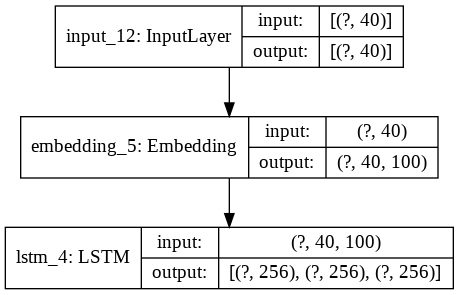

In [ ]:
# Plot the decoder LSTM
from keras.utils import plot_model
plot_model(encoder_model, to_file='model_plot_dec.png', show_shapes=True, show_layer_names=True)

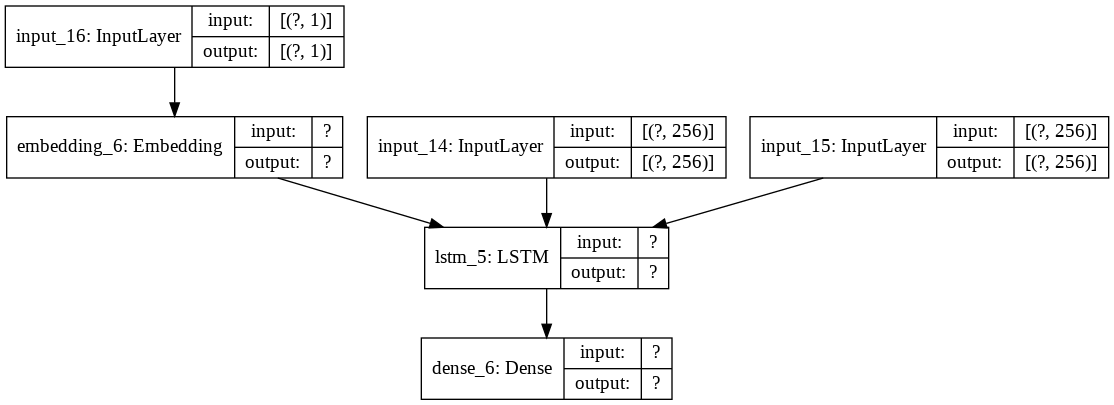

In [ ]:
# Plot the decoder LSTM
from keras.utils import plot_model
plot_model(decoder_model, to_file='model_plot_dec.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Dictionaries for input and ouput
# They help converting the integers back to words.
idx2word_input = {v:k for k, v in word2idx_inputs.items()}
idx2word_target = {v:k for k, v in word2idx_outputs.items()}

In [ ]:
# Predicts the answer for an input sentence.
def answer_sentence(input_seq):
    # The encoder model predicts the hidden and cell state.
    states_value = encoder_model.predict(input_seq)
    # Target stores the integer representation of <sos>
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = word2idx_outputs['<sos>']
    # Eos stores the integer representation of <eos>
    eos = word2idx_outputs['<eos>']
    # Stores the response
    output_sentence = []

    # Every iteration a word of the output sentence is predicted.
    for _ in range(max_out_len):
        # The output, the hidden and cell states are predicted.
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        # The most probable word is selected.
        idx = np.argmax(output_tokens[0, 0, :])
        # If the word is <eos>, the loop ends.
        if eos == idx:
            break

        word = ''
        # The token is converted to a word and added to the output sentence
        if idx > 0:
            word = idx2word_target[idx]
            output_sentence.append(word)
        # Target_eq and states_value are refreshed.
        target_seq[0, 0] = idx
        states_value = [h, c]

    return ' '.join(output_sentence)

In [ ]:
i = np.random.choice(len(input_sentences))
input_seq = encoder_input_sequences[i:i+1]
translation = answer_sentence(input_seq)
print('-')
print('Input:', input_sentences[i])
print('Response:', translation)

-
Input: The description sounds more like Bioshock to me, though.
Response: i don't have to be a lot of the


### Further training and hyperparameter optimization

In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-gpu
clear_output()

In [ ]:
!pip install keras-tuner
clear_output()

In [ ]:
!pip install googledrivedownloader

In [ ]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [ ]:
# import statements
import tensorflow as tf
from tensorflow import keras
import numpy as np

import numpy as np
from tensorflow.keras.layers import Embedding

from tensorflow.keras.layers import LSTM, Input, Dense, Dropout, Bidirectional
from tensorflow.keras import Model

In [ ]:
def build_model(hp):
  '''
    this function defines the model structure with some parameters being defines as a hyperparamter
    in some places the hyperparameters are commented out, this is due to the fact, that it would have taken to much time to optimize for everything
  '''
  # set number of LSTM nodes
  LSTM_NODES = 256 # hp.Choice('nodes_var', values = [256, 512])

  # The encoder of the model is defined.
  # The input of the encoder are the sentences and the output is
  # the hidden state and cell state of the LSTM.

  embedding_layer = Embedding(num_words, EMBEDDING_SIZE, weights=[embedding_matrix], input_length=40)
  encoder_inputs_placeholder = Input(shape=(40,))
  x = embedding_layer(encoder_inputs_placeholder)


  encoder = LSTM(LSTM_NODES, return_state=True)

  encoder_outputs, h, c = encoder(x)
  encoder_states = [h, c]

  # The decoder is defined.
  # The input of the decoder are the hidden state and cell state of the
  # encoder and the input sentence.
  decoder_inputs_placeholder = Input(shape=(44,))

  decoder_embedding = Embedding(num_words, LSTM_NODES)
  decoder_inputs_x = decoder_embedding(decoder_inputs_placeholder)

  decoder_lstm = LSTM(LSTM_NODES, return_sequences=True, return_state=True)

  decoder_outputs, _, _ = decoder_lstm(decoder_inputs_x, initial_state=encoder_states)

  activation_var = 'relu' # hp.Choice('activation_var', values = ['relu', 'sigmoid'])

  nodes_var = hp.Int('nodes_var', min_value=3000,max_value=5000, step=1000)
  for i in range(hp.Int('n_layers', 0, 2)):  # adding variation of layers.
    new_dense_layer = Dense(nodes_var, activation=activation_var)
    decoder_outputs = new_dense_layer(decoder_outputs)
    new_dropout_layer = Dropout(0.2)
    decoder_outputs = new_dropout_layer(decoder_outputs)

  mid_layer = Dense(nodes_var, activation=activation_var)
  decoder_outputs_2 = mid_layer(decoder_outputs)

  # The output of the decoder is given to a dense layer to predict
  # the decoder output.
  decoder_dense = Dense(num_words, activation='softmax')
  decoder_outputs = decoder_dense(decoder_outputs)

  # The model is connected and compiled. There are two inputs: the
  # encoder and the decoder input.
  model = Model([encoder_inputs_placeholder,
    decoder_inputs_placeholder], decoder_outputs)

  
  model.compile(
      optimizer=hp.Choice('optimizer_var', values = ['rmsprop', 'adam']),#,'sgd','nadam','adagard']),
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )
  return model


In [ ]:
# remove output dir if exists
!rm /content/output -r

In [ ]:
tuner = None

In [ ]:
from kerastuner.tuners import Hyperband
# setup tuner model, testing for val_accuracy
tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    factor=3,
    max_epochs=10,
    directory='output',
    project_name='Chatbot_hyperband')

In [ ]:
# search space of the tuner
tuner.search_space_summary()

Search space summary
Default search space size: 3
nodes_var (Int)
{'default': None, 'conditions': [], 'min_value': 3000, 'max_value': 5000, 'step': 1000, 'sampling': None}
n_layers (Int)
{'default': None, 'conditions': [], 'min_value': 0, 'max_value': 2, 'step': 1, 'sampling': None}
optimizer_var (Choice)
{'default': 'rmsprop', 'conditions': [], 'values': ['rmsprop', 'adam'], 'ordered': False}


In [ ]:
# create train and validation data generators
train_d, val_d = get_LSTM_data_generator(encoder_input_sequences, decoder_input_sequences, decoder_output_sequences, BATCH_SIZE, max_out_len, num_words)

In [ ]:
tuner.search(
    x=train_d,
    validation_data = val_d,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS
)

Trial 26 Complete [00h 21m 56s]
val_accuracy: 0.751384437084198

Best val_accuracy So Far: 0.7525262832641602
Total elapsed time: 05h 05m 46s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.get_best_models(num_models=3)

In [ ]:
# show results
tuner.results_summary()

Results summary
Results in output/Chatbot_hyperband
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
nodes_var: 5000
n_layers: 1
optimizer_var: rmsprop
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 409bb2a45a0639ddef05b39fcededdf2
Score: 0.7525262832641602
Trial summary
Hyperparameters:
nodes_var: 3000
n_layers: 2
optimizer_var: adam
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 981fac179c2935543033f2d89d32c9e1
Score: 0.751384437084198
Trial summary
Hyperparameters:
nodes_var: 4000
n_layers: 2
optimizer_var: adam
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: aaf0d9ce88667ba1fe536c10c7a4dd0d
Score: 0.7512664794921875
Trial summary
Hyperparameters:
nodes_var: 5000
n_layers: 2
optimizer_var: adam
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 3a8338c433170feee115e5e2d6431b

### Training the optimized model

In [ ]:
# Using the best parameters from the hyperparameter optimalization
BATCH_SIZE = 64
EPOCHS = 50
MAX_NUM_WORDS = num_words
LSTM_NODES = 256
N_LAYERS = 1
NODES_VAR = 5000
OPTIMIZER_VAR = 'rmsprop'

In [ ]:
def build_model():
    # set number of LSTM nodes

    # The encoder of the model is defined.
    # The input of the encoder are the sentences and the output is
    # the hidden state and cell state of the LSTM.

    embedding_layer = Embedding(MAX_NUM_WORDS, EMBEDDING_SIZE, weights=[embedding_matrix], input_length=40)
    encoder_inputs_placeholder = Input(shape=(40,))
    x = embedding_layer(encoder_inputs_placeholder)

    encoder = LSTM(LSTM_NODES, return_state=True)

    encoder_outputs, h, c = encoder(x)
    encoder_states = [h, c]

    # The decoder is defined.
    # The input of the decoder are the hidden state and cell state of the
    # encoder and the input sentence.
    decoder_inputs_placeholder = Input(shape=(44,))

    decoder_embedding = Embedding(MAX_NUM_WORDS, LSTM_NODES)
    decoder_inputs_x = decoder_embedding(decoder_inputs_placeholder)

    decoder_lstm = LSTM(LSTM_NODES, return_sequences=True, return_state=True)

    decoder_outputs, _, _ = decoder_lstm(decoder_inputs_x, initial_state=encoder_states)

    activation_var = 'relu'
    nodes_var = NODES_VAR
    for i in range(N_LAYERS):
      new_dense_layer = Dense(nodes_var, activation=activation_var)
      decoder_outputs = new_dense_layer(decoder_outputs)
      new_dropout_layer = Dropout(0.2)
      decoder_outputs = new_dropout_layer(decoder_outputs)

    mid_layer = Dense(nodes_var, activation=activation_var)
    decoder_outputs_2 = mid_layer(decoder_outputs)

    # The output of the decoder is given to a dense layer to predict
    # the decoder output.
    decoder_dense = Dense(MAX_NUM_WORDS, activation='softmax')
    decoder_outputs = decoder_dense(decoder_outputs)

    # The model is connected and compiled. There are two inputs: the
    # encoder and the decoder input.
    model = Model([encoder_inputs_placeholder,
      decoder_inputs_placeholder], decoder_outputs)

    
    model.compile(
        optimizer=OPTIMIZER_VAR,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [ ]:
# my_data = LSTM_train_data_generator(encoder_input_sequences, decoder_input_sequences, decoder_output_sequences, BATCH_SIZE, max_out_len, num_words)
# my_model = build_model()

64


In [ ]:
# create train and validation data generators
train_d, val_d = get_LSTM_data_generator(encoder_input_sequences, decoder_input_sequences, decoder_output_sequences, BATCH_SIZE, max_out_len, num_words)

In [ ]:
# define structure of model
my_model = build_model()

In [ ]:
# define callbacks
# early stopping for reducing training time

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5)

# modelCheckpoint for saving the best weights

checkpoint_filepath = 'my_model_checkpoint'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# This function can be used to load the best weights
# model.load_weights(checkpoint_filepath)


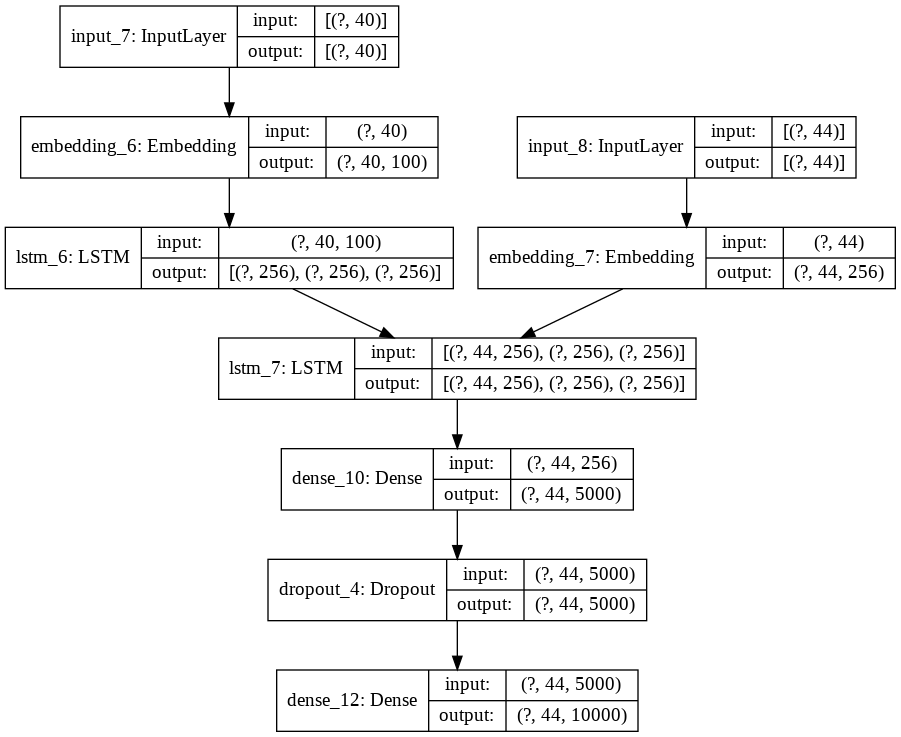

In [ ]:
from keras.utils import plot_model
plot_model(my_model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = my_model.fit(
    x=train_d,
    validation_data = val_d,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[model_checkpoint_callback, es]
)

Epoch 1/50
625/625 [==============================] - 254s 406ms/step - loss: 1.7115 - accuracy: 0.7404 - val_loss: 1.6578 - val_accuracy: 0.7478
Epoch 2/50
625/625 [==============================] - 250s 401ms/step - loss: 1.6568 - accuracy: 0.7441 - val_loss: 1.6379 - val_accuracy: 0.7498
Epoch 3/50
625/625 [==============================] - 251s 402ms/step - loss: 1.6190 - accuracy: 0.7468 - val_loss: 1.6219 - val_accuracy: 0.7512
Epoch 4/50
625/625 [==============================] - 251s 401ms/step - loss: 1.5886 - accuracy: 0.7489 - val_loss: 1.6153 - val_accuracy: 0.7522
Epoch 5/50
625/625 [==============================] - 251s 402ms/step - loss: 1.5606 - accuracy: 0.7511 - val_loss: 1.6138 - val_accuracy: 0.7530
Epoch 6/50
625/625 [==============================] - 251s 402ms/step - loss: 1.5342 - accuracy: 0.7529 - val_loss: 1.6163 - val_accuracy: 0.7533
Epoch 7/50
625/625 [==============================] - 250s 400ms/step - loss: 1.5071 - accuracy: 0.7549 - val_loss: 1.6247 -

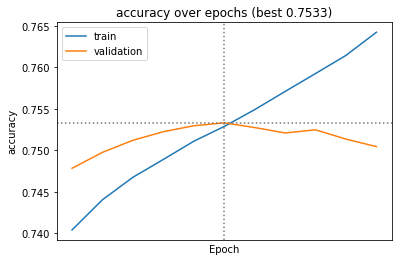

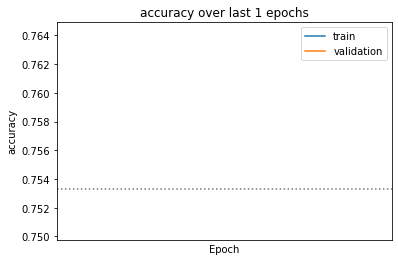

In [ ]:
# plotting the accuracy
pretty_plot(history, 'accuracy', lambda x: np.argmax(x))

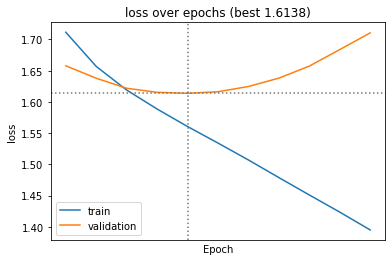

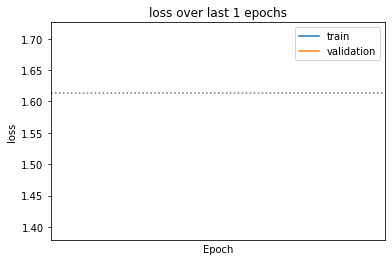

In [ ]:
# plotting the loss
pretty_plot(history, 'loss', lambda x: np.argmin(x))

In [ ]:
# save model
my_model.save('model_best')

INFO:tensorflow:Assets written to: model_best/assets


In [ ]:
# zip saved model
!zip -r model_best.zip model_best

  adding: model_best/ (stored 0%)
  adding: model_best/assets/ (stored 0%)
  adding: model_best/saved_model.pb (deflated 90%)
  adding: model_best/variables/ (stored 0%)
  adding: model_best/variables/variables.index (deflated 65%)
  adding: model_best/variables/variables.data-00000-of-00001 (deflated 13%)


In [ ]:
!unzip model_4.zip

Archive:  model_4.zip
   creating: model_4/
   creating: model_4/assets/
  inflating: model_4/saved_model.pb  
   creating: model_4/variables/
  inflating: model_4/variables/variables.data-00000-of-00001  
  inflating: model_4/variables/variables.index  


In [ ]:
from tensorflow.keras.models import load_model
model_best = load_model('model_best', compile=False)

In [ ]:
def create_encoder_decoder_models(from_model):
  encoder_inputs_placeholder = Input(shape=(40,))

  embedding_layer = from_model.get_layer('embedding_6')
  x = embedding_layer(encoder_inputs_placeholder)

  encoder = from_model.get_layer('lstm_6')

  encoder_outputs, h, c = encoder(x)
  encoder_states = [h, c]

  encoder_model = Model(encoder_inputs_placeholder, encoder_states)


  ##################

  decoder_state_input_h = Input(shape=(LSTM_NODES,))
  decoder_state_input_c = Input(shape=(LSTM_NODES,))
  decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

  decoder_inputs_single = Input(shape=(1,))
  decoder_embedding = from_model.get_layer('embedding_7')
  decoder_inputs_single_x = decoder_embedding(decoder_inputs_single)

  decoder_lstm = from_model.get_layer('lstm_7')
  decoder_outputs, h, c = decoder_lstm(decoder_inputs_single_x, initial_state=decoder_states_inputs)

  decoder_states = [h, c]

  opt_dense_0 = from_model.get_layer('dense_10')

  decoder_outputs = opt_dense_0(decoder_outputs)

  decoder_dense = from_model.get_layer('dense_12')
  decoder_outputs = decoder_dense(decoder_outputs)

  decoder_model = Model(
      [decoder_inputs_single] + decoder_states_inputs,
      [decoder_outputs] + decoder_states
  )

  
  return encoder_model, decoder_model



In [ ]:
test_model_enc, test_model_dec = create_encoder_decoder_models(model_best)

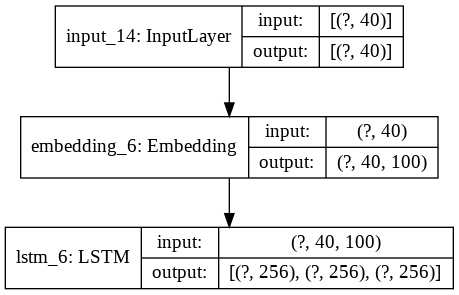

In [ ]:
from keras.utils import plot_model
plot_model(test_model_enc, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

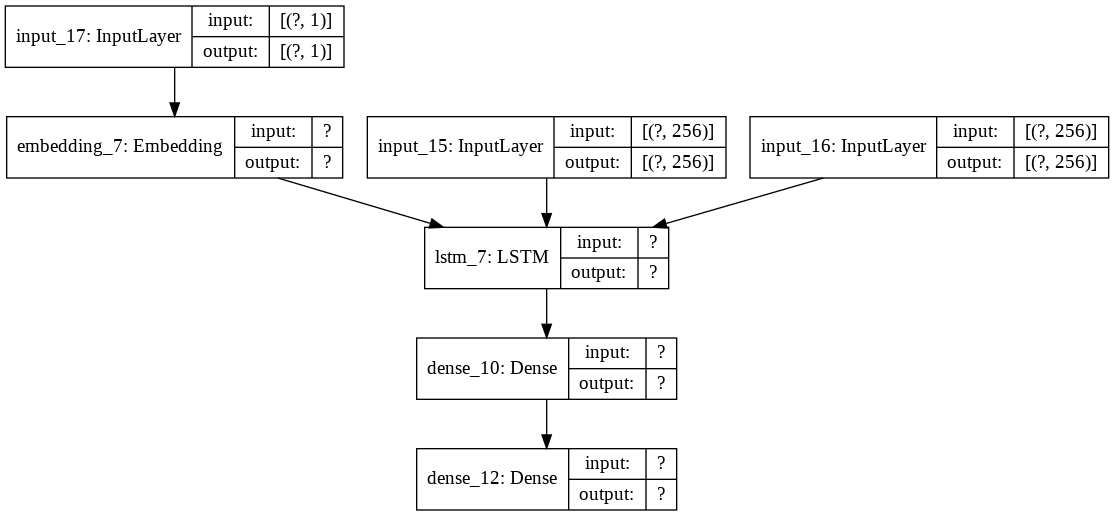

In [ ]:
from keras.utils import plot_model
plot_model(test_model_dec, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Dictionaries for input and ouput
# They help converting the integers back to words.
idx2word_input = {v:k for k, v in word2idx_inputs.items()}
idx2word_target = {v:k for k, v in word2idx_outputs.items()}

In [ ]:
# Predicts the answer for an input sentence.
def answer_sentence_1(input_seq):
    # The encoder model predicts the hidden and cell state.
    states_value = test_model_enc.predict(input_seq)
    # Target stores the integer representation of <sos>
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = word2idx_outputs['<sos>']
    # Eos stores the integer representation of <eos>
    eos = word2idx_outputs['<eos>']
    # Stores the response
    output_sentence = []

    # Every iteration a word of the output sentence is predicted.
    for _ in range(max_out_len):
        # The output, the hidden and cell states are predicted.
        output_tokens, h, c = test_model_dec.predict([target_seq] + states_value)
        # The most probable word is selected.
        idx = np.argmax(output_tokens[0, 0, :])
        # If the word is <eos>, the loop ends.
        if eos == idx:
            break

        word = ''
        # The token is converted to a word and added to the output sentence
        if idx > 0:
            word = idx2word_target[idx]
            output_sentence.append(word)
        # Target_eq and states_value are refreshed.
        target_seq[0, 0] = idx
        states_value = [h, c]

    return ' '.join(output_sentence)

In [ ]:
len(input_sentences)
# len(encoder_input_sequences)

479901

### Evaluation
Download our best model from the google drive link, unzip the model and load the model, then evaluate few input/response pairs before moving on to manual user inputs.(For the input sentences to work, the related cells(Preprocessing, Word embeddings) should be first run)  Evaluate a few input sentences

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd
# insert the google drive link id into the file_id parameter and download model
gdd.download_file_from_google_drive(file_id='1gH57tBrE9z5GMEndVtXbATF9c6_IQV18',
                                    dest_path='./model_best.zip',
                                    unzip=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# unzip the downloaded model
!unzip model_best.zip

In [ ]:
from tensorflow.keras.models import load_model
# load model
reconstructed_model = load_model('model_best', compile=False)

In [ ]:
# Testing a few message-response pairs from the dataset
for _ in range(5):
  i = np.random.choice(len(xy_data_df))
  input_seq = encoder_input_sequences[i:i+1]
  translation = answer_sentence_1(input_seq)
  print('-')
  print('Input: ', input_sentences[i])
  print('Response: ', translation)
  print("Actual response: ",xy_data_df['output_input'][i][6:])

-
Input:  I made breakfast
Response:  i love you
Actual response:  What did you make? 

I didn't; I had strawberry quark, which is German cheese that's the consistency of Greek yogurt.
-
Input:  Between what, the top four or five teams, and the bottom 3?
Response:  i think the same thing being in the world is still a lot more than the other
Actual response:  even thats better than 1 or 2 teams just dominating every year
-
Input:  You mean the James Cameron one or the Last Airbender?

 Oh wait silly me, that one doesn't exist.
Response:  i think you are the same thing
Actual response:  The James Cameron one!
-
Input:  Oh I'm sorry. As they say, "the good die young, and others just die"
Response:  i think you were the only one that made me feel like a lot of people who don't want to be a
Actual response:  He was young considering. 46. He was a good person in general. He just really resented my mom for the divorce I guess and I was the easiest way for him to get back at my mom.
-
Input:  

In [ ]:
# testing a few responses to the manual inputs
while True:
  print('-')
  my_inp = input()

  if my_inp == 'q':
    break

  tokenized_input = input_tokenizer.texts_to_sequences([my_inp])
  input_seq = pad_sequences(tokenized_input, maxlen=max_input_len)
  translation = answer_sentence_1(input_seq)
  print('Response:', translation)

-
I saw Star Wars last night, but LOTR was better
Response: i was thinking of the game that was the first time i had to play it
-
I really like mario
Response: i don't know what you are talking about
-
But what about her emails?
Response: i know
-
Thanks obama
Response: no problem here
-
Good bot
Response: i am not a fan of the
-
Thank you for being such a great learning experience
Response: thank you
-
q


### Saving and loading a model
This section shows how to save and download models easily

In [ ]:
# save model
model.save('model_x')
clear_output()

In [ ]:
# zip saved model
!zip -r model_x.zip model_x
clear_output()

  adding: model_2/ (stored 0%)
  adding: model_2/assets/ (stored 0%)
  adding: model_2/saved_model.pb (deflated 90%)
  adding: model_2/variables/ (stored 0%)
  adding: model_2/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: model_2/variables/variables.index (deflated 64%)


At this stage upload the downloaded model to google drive.

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd
# insert the google drive link id into the file_id parameter and download model
gdd.download_file_from_google_drive(file_id='1mpYifGZ_TLrer6ZgRtNKO25xSuMOPi1u',
                                    dest_path='./model_x.zip',
                                    unzip=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# unzip the downloaded model
!unzip model_x.zip

In [ ]:
from tensorflow.keras.models import load_model
# load model
reconstructed_model = load_model('model_x', compile=False)

### Conclusion

After the initial training we ran a hyperparameter optimization on the model, this process took almost 5 hours. Since the google colab site only gave us 12 GBs of RAM to work with, we had to implement a generator that was used to train the model instead of saving the whole one hot encoded matrix in memory.
This generator generated the training and the validation datasets.
Creating the generator was no easy task and took many attempts, but the resulting model could be trained with validation accuracy in mind.

We tested the resulting model in two ways: 
  1: We compared the results from input sentences with the actual response to those sentences, and determined if those were acceptable. 
  2: We then tried a few manual inputs, to see if the model holds up when answering to sentences not in the dataset which it was trained on.

Testing this is subjective as we can try and draw conclusions from this. Most of the answers will make vague contextual sense, as they can be believable and the model can draw parallels between different words, for instance it replied with the word "game" when the input message was about star wars, an arguement can be made about how those two are connected.

We are happy of the initial results of our model as the model clearly learned how to structure sentences. Some answers are missing words at the end of the sentences, since the model lacks the vocabulary to fill it, as it was trained on only 10000 words instead of the more than 30000 unique words that were present in the raw dataset. 

An obvious step forward is to train the model on all available words in the dataset, thereby filling the gaps in the current models vocabulary.
An other obvious step is to increase the raw data we train the model on (the number of comments), but since the comments are from an uncorrected (borderline degenerate) site, this might not help the model output better sentences.

The final trained model can be found here:
[google drive](https://drive.google.com/file/d/1gH57tBrE9z5GMEndVtXbATF9c6_IQV18/view?usp=sharing)